In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import euclidean_distances
from sklearn.manifold import MDS

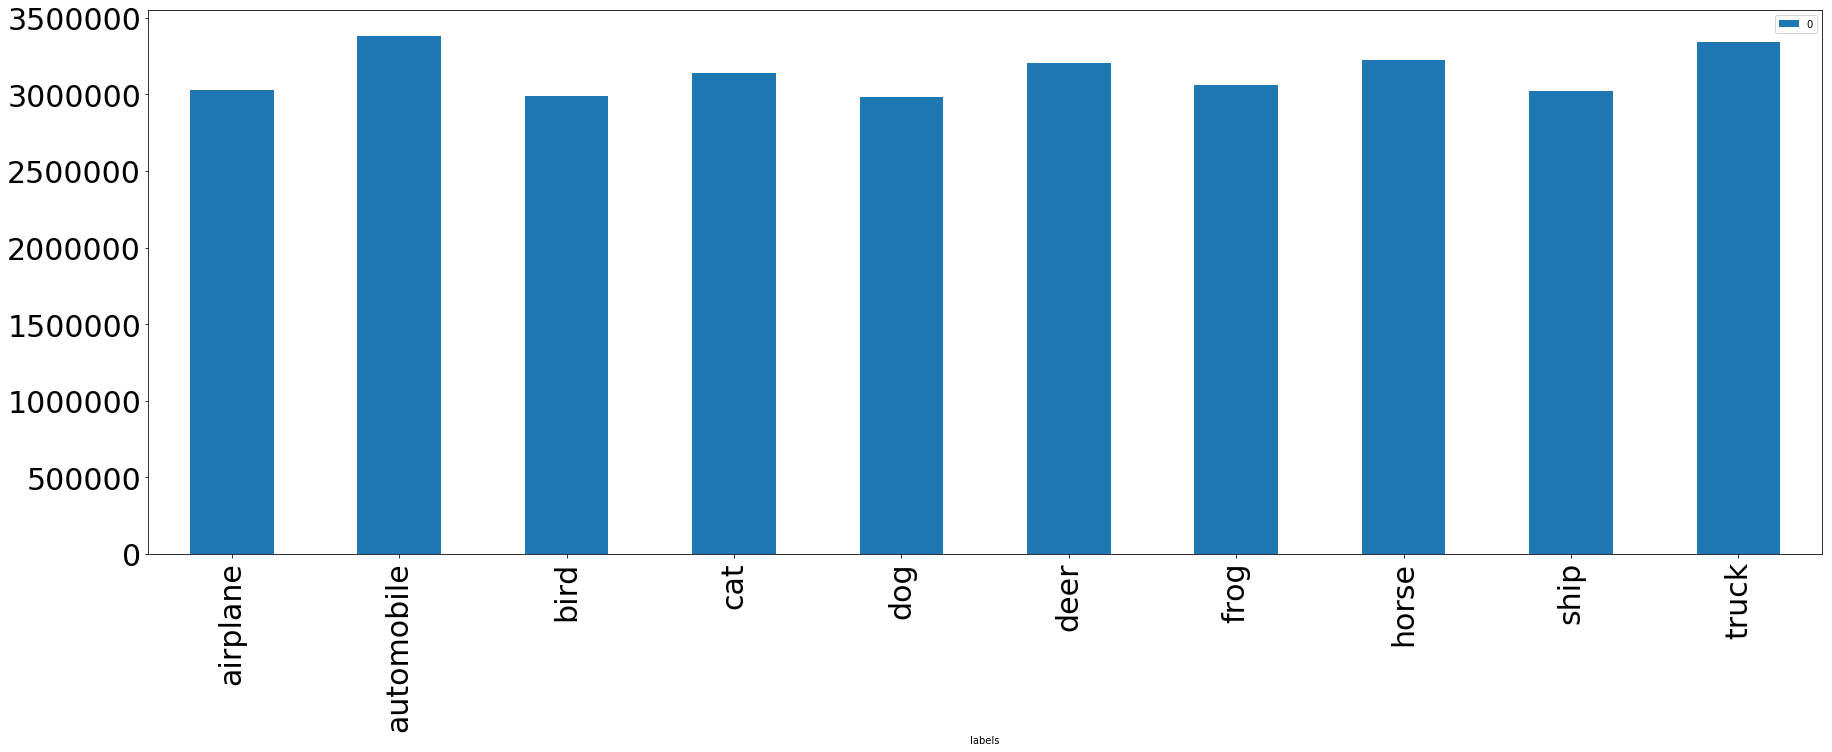

In [3]:
""" CIFAR-10 is a dataset of 32x32 images in 10 categories, collected by Alex
Krizhevsky, Vinod Nair, and Geoffrey Hinton. It is often used to evaluate
machine learning algorithms. You can download this dataset from https://
www.cs.toronto.edu/∼kriz/cifar.html.
(a) For each category, compute the mean image and the first 20 principal
components. Plot the error resulting from representing the images of each
category using the first 20 principal components against the category.
(b) Compute the distances between mean images for each pair of classes. Use
principal coordinate analysis to make a 2D map of the means of each
categories. For this exercise, compute distances by thinking of the images
as vectors. """


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def getDataAndLabels(filename):
    batch = unpickle(filename)
    batch_data = batch[b'data']
    batch_labels = batch[b'labels']
    data_df = pd.DataFrame(batch_data)
    labels_df = pd.DataFrame(batch_labels, columns = ['Label'])
    return data_df, labels_df 

def compute_pca(frame):
    pca = PCA(n_components=20)
    np_frame = np.array(frame)
    score = pca.fit_transform(np_frame)
    reconstruction = pca.inverse_transform(score)
    loss = ((np_frame - reconstruction) ** 2).mean()*len(reconstruction[0])
    return loss


def graph_loss(data):
    data_df = pd.DataFrame(data)
    labels = pd.DataFrame(['airplane', 'automobile', 'bird', 'cat' ,'dog', 'deer', 'frog', 'horse', 'ship', 'truck'])
    data_df['labels'] = labels
    row = data_df.iloc[:]
    row.index = data_df['labels']
    row.plot(kind='bar', figsize=[30,10], fontsize=30)
    plt.savefig('figure.png')

b1_data, b1_labels = getDataAndLabels('cifar-10-batches-py/data_batch_1')
b2_data, b2_labels = getDataAndLabels('cifar-10-batches-py/data_batch_2')
b3_data, b3_labels = getDataAndLabels('cifar-10-batches-py/data_batch_3')
b4_data, b4_labels = getDataAndLabels('cifar-10-batches-py/data_batch_4')
b5_data, b5_labels = getDataAndLabels('cifar-10-batches-py/data_batch_5')
b6_data, b6_labels = getDataAndLabels('cifar-10-batches-py/test_batch')

data_combined = pd.concat([b1_data, b2_data, b3_data, b4_data, b5_data])
labels_combined = pd.concat([b1_labels, b2_labels, b3_labels, b4_labels, b5_labels])

airplane_loc = (labels_combined.loc[labels_combined['Label'] == 0]).index.values
automobile_loc = (labels_combined.loc[labels_combined['Label'] == 1]).index.values
bird_loc = (labels_combined.loc[labels_combined['Label'] == 2]).index.values
cat_loc = (labels_combined.loc[labels_combined['Label'] == 3]).index.values
deer_loc = (labels_combined.loc[labels_combined['Label'] == 4]).index.values
dog_loc = (labels_combined.loc[labels_combined['Label'] == 5]).index.values
frog_loc = (labels_combined.loc[labels_combined['Label'] == 6]).index.values
horse_loc = (labels_combined.loc[labels_combined['Label'] == 7]).index.values
ship_loc = (labels_combined.loc[labels_combined['Label'] == 8]).index.values
truck_loc = (labels_combined.loc[labels_combined['Label'] == 9]).index.values

airplane = data_combined.iloc[airplane_loc, :]
automobile = data_combined.iloc[automobile_loc, :]
bird = data_combined.iloc[bird_loc, :]
cat = data_combined.iloc[cat_loc, :]
deer = data_combined.iloc[deer_loc, :]
dog = data_combined.iloc[dog_loc, :]
frog = data_combined.iloc[frog_loc, :]
horse = data_combined.iloc[horse_loc, :]
ship = data_combined.iloc[ship_loc, :]
truck = data_combined.iloc[truck_loc, :]

data = []
data.append(compute_pca(airplane))
data.append(compute_pca(automobile))
data.append(compute_pca(bird))
data.append(compute_pca(cat))
data.append(compute_pca(deer))
data.append(compute_pca(dog))
data.append(compute_pca(frog))
data.append(compute_pca(horse))
data.append(compute_pca(ship))
data.append(compute_pca(truck))

graph_loss(data)

In [7]:
XData=[None]*10
XMean=[None]*10

X=pd.DataFrame()
Y=pd.DataFrame()

X=pd.concat([X,b1_data,b2_data,b3_data,b4_data,b5_data])
Y=pd.concat([Y,b1_labels,b2_labels,b3_labels,b4_labels,b5_labels])
X['label'] = Y
X_groups = X.groupby('label')

for i in range(len(XData)):
    thisData = X_groups.get_group(i)
    XData[i]=thisData.drop('label', axis=1)
    thisMean=XData[i].mean()
    XMean[i] = thisMean.values.astype('uint8')

In [19]:
print('part2 mean distance')
meanD=euclidean_distances(XMean)
meanD_Df=pd.DataFrame(meanD)
display(meanD_Df)


part2 mean distance


,0,1,2,3,4,5,6,7,8,9
0,0.000000,1654.730189,1585.680296,1882.820491,2111.054713,1961.776236,2424.339910,1654.765844,919.569464,1438.046244
1,1654.730189,0.000000,884.148178,1026.617261,1138.151132,1218.766590,1193.062446,954.134162,1308.032110,944.762933
2,1585.680296,884.148178,0.000000,521.832349,586.562870,713.827710,913.831494,415.516546,1562.088346,1419.217742
3,1882.820491,1026.617261,521.832349,0.000000,467.047107,406.259769,681.367008,594.581365,1849.292027,1678.464179
4,2111.054713,1138.151132,586.562870,467.047107,0.000000,606.024752,473.807978,660.566424,2056.345788,1824.006305
5,1961.776236,1218.766590,713.827710,406.259769,606.024752,0.000000,815.763446,849.232595,1909.147454,1889.833061
6,2424.339910,1193.062446,913.831494,681.367008,473.807978,815.763446,0.000000,941.802527,2252.867950,1914.318417
7,1654.765844,954.134162,415.516546,594.581365,660.566424,849.232595,941.802527,0.000000,1677.863522,1364.819036
8,919.569464,1308.032110,1562.088346,1849.292027,2056.345788,1909.147454,2252.867950,1677.863522,0.000000,1074.785095
9,1438.046244,944.762933,1419.217742,1678.464179,1824.006305,1889.833061,1914.318417,1364.819036,1074.785095,0.000000


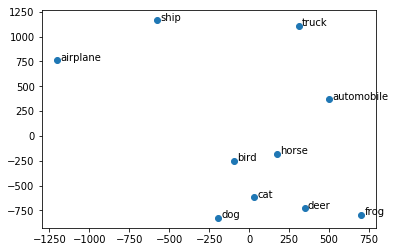

In [24]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
mds=MDS(n_components=2, dissimilarity="precomputed", n_jobs=1)
pos=mds.fit(meanD).embedding_
plt.figure()
plt.scatter(pos[:,0], pos[:,1])
for i in range (0,10):
    xy=(pos[i][0]+20,pos[i][1])
    plt.annotate(labels[i],xy)
plt.show()